# Spotify Song Analysis

## Import Data From Kaggle

In [2]:
#This may take a while to run

# Install dependencies as needed:
import kagglehub
import pandas as pd
import numpy as np
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "high_popularity_spotify_data.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "solomonameh/spotify-music-dataset",
  file_path,
)

<ipython-input-2-e6b7c1640597>:13: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


100%|██████████| 713k/713k [00:00<00:00, 2.02MB/s]


In [5]:
#View some infrmation about the data
pd.set_option('display.max_columns', None)
df.head(99999)

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,track_popularity,track_href,uri,track_album_name,playlist_name,analysis_url,track_id,track_name,track_album_release_date,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id
0,0.592,157.969,0.521,pop,-7.777,0.1220,0.535,"Lady Gaga, Bruno Mars",3,0.0304,100,https://api.spotify.com/v1/tracks/2plbrEY59Iik...,spotify:track:2plbrEY59IikOBgBGLjaoe,Die With A Smile,Today's Top Hits,https://api.spotify.com/v1/audio-analysis/2plb...,2plbrEY59IikOBgBGLjaoe,Die With A Smile,2024-08-16,0.000000,10FLjwfpbxLmW8c25Xyc2N,0,6,251668,0.3080,2plbrEY59IikOBgBGLjaoe,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
1,0.507,104.978,0.747,pop,-10.171,0.1170,0.438,Billie Eilish,4,0.0358,97,https://api.spotify.com/v1/tracks/6dOtVTDdiauQ...,spotify:track:6dOtVTDdiauQNBQEDOtlAB,HIT ME HARD AND SOFT,Today's Top Hits,https://api.spotify.com/v1/audio-analysis/6dOt...,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,2024-05-17,0.060800,7aJuG4TFXa2hmE4z1yxc3n,1,2,210373,0.2000,6dOtVTDdiauQNBQEDOtlAB,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
2,0.808,108.548,0.554,pop,-4.169,0.1590,0.372,Gracie Abrams,4,0.0368,93,https://api.spotify.com/v1/tracks/7ne4VBA60CxG...,spotify:track:7ne4VBA60CxGM75vw0EYad,The Secret of Us (Deluxe),Today's Top Hits,https://api.spotify.com/v1/audio-analysis/7ne4...,7ne4VBA60CxGM75vw0EYad,That’s So True,2024-10-18,0.000000,0hBRqPYPXhr1RkTDG3n4Mk,1,1,166300,0.2140,7ne4VBA60CxGM75vw0EYad,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
3,0.910,112.966,0.670,pop,-4.070,0.3040,0.786,Sabrina Carpenter,4,0.0634,81,https://api.spotify.com/v1/tracks/1d7Ptw3qYcfp...,spotify:track:1d7Ptw3qYcfpdLNL5REhtJ,Short n' Sweet,Today's Top Hits,https://api.spotify.com/v1/audio-analysis/1d7P...,1d7Ptw3qYcfpdLNL5REhtJ,Taste,2024-08-23,0.000000,4B4Elma4nNDUyl6D5PvQkj,0,0,157280,0.0939,1d7Ptw3qYcfpdLNL5REhtJ,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
4,0.783,149.027,0.777,pop,-4.477,0.3550,0.939,"ROSÉ, Bruno Mars",4,0.2600,98,https://api.spotify.com/v1/tracks/5vNRhkKd0yEA...,spotify:track:5vNRhkKd0yEAg8suGBpjeY,APT.,Today's Top Hits,https://api.spotify.com/v1/audio-analysis/5vNR...,5vNRhkKd0yEAg8suGBpjeY,APT.,2024-10-18,0.000000,2IYQwwgxgOIn7t3iF6ufFD,0,0,169917,0.0283,5vNRhkKd0yEAg8suGBpjeY,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,0.422,124.357,0.573,latin,-7.621,0.1020,0.693,Libianca,5,0.0678,76,https://api.spotify.com/v1/tracks/26b3oVLrRUaa...,spotify:track:26b3oVLrRUaaybJulow9kz,People,Afro-Latin Party,https://api.spotify.com/v1/audio-analysis/26b3...,26b3oVLrRUaaybJulow9kz,People,2022-12-06,0.000013,5Hmh6N8oisrcuZKa8EY5dn,0,10,184791,0.5510,26b3oVLrRUaaybJulow9kz,afro-latin,audio_features,0oU30cCr8klmMsuOKHDLkh
1682,0.725,105.016,0.711,latin,-8.315,0.1100,0.530,Omah Lay,4,0.0941,74,https://api.spotify.com/v1/tracks/1wADwLSkYhrS...,spotify:track:1wADwLSkYhrSmy4vdy6BRn,Boy Alone,Afro-Latin Party,https://api.spotify.com/v1/audio-analysis/1wAD...,1wADwLSkYhrSmy4vdy6BRn,soso,2022-07-14,0.129000,5NLjxx8nRy9ooUmgpOvfem,0,3,183057,0.4240,1wADwLSkYhrSmy4vdy6BRn,afro-latin,audio_features,0oU30cCr8klmMsuOKHDLkh
1683,0.809,99.005,0.724,latin,-5.022,0.0765,0.606,"Davido, FAVE",4,0.0929,69,https://api.spotify.com/v1/tracks/7vKXc90NT5WB...,spotify:track:7vKXc90NT5WBm3UTT4iTVG,Timeless,Afro-Latin Party,https://api.spotify.com/v1/audio-analysis/7vKX...,7vKXc90NT5WBm3UTT4iTVG,KANTE (feat. Fave),2023-03-30,0.000000,6lI21W76LD0S3vC55GrfSS,0,6,194040,0.1820,7vKXc90NT5WBm3UTT4iTVG,afro-latin,audio_features,0oU30cCr8klmMsuOKHDLkh
1684,0.642,83.389,0.463,latin,-4.474,0.0686,0.339,"Future, Drake, Tems",4,0.3400,82,https://api.spotify.com/v1/tracks/59nOXPmaKlBf...,spotify:track:59nOXPmaKlBfGMDeOVGrIK,I NEVER LIKED YOU,Afro-Latin Party,https://api.spotify.com/v1/audio-analysis/59nO...,59nOX

## Cleaning and Organizing Data

## Overview
I will be examining statistics from highly streamed songs on Spotify to observe trends. Spotify is a music streaming service with an API that allows for analysis of the data of all its users. Using another dataset, I can compare how these same songs perform on various platforms such as YouTube.

## Questions
1. What parts of a song have the highest impact on its popularity?
2. What is the most interesting outlier in the data? (What song is popular despite not being like the rest and why?)
3. How do the statistics and rankings compare on Spotify vs YouTube?
4. Can songs be automatically categorized to certain genres based on their features such as tempo and energ?

In [4]:
# sort by track popularity
#df.sort_values(by='track_popularity', ascending=False)

df.sort_values(by='duration_ms', ascending=False)

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,track_popularity,track_href,uri,track_album_name,playlist_name,analysis_url,track_id,track_name,track_album_release_date,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id
1225,0.8340,118.222,0.249,rock,-8.210,0.0924,0.337,Lynyrd Skynyrd,4,0.0574,75,https://api.spotify.com/v1/tracks/5EWPGh7jbTNO...,spotify:track:5EWPGh7jbTNO2wakv8LjUI,Pronounced' Leh-'Nerd 'Skin-'Nerd,Southern Rock,https://api.spotify.com/v1/audio-analysis/5EWP...,5EWPGh7jbTNO2wakv8LjUI,Free Bird,1973-01-01,0.000097,6DExt1eX4lflLacVjHHbOs,1,0,547107,0.074200,5EWPGh7jbTNO2wakv8LjUI,southern,audio_features,37i9dQZF1DXbDjX0hus3Iu
112,0.4820,138.453,0.529,rock,-11.709,0.0842,0.492,Don McLean,4,0.0599,74,https://api.spotify.com/v1/tracks/1fDsrQ23eTAV...,spotify:track:1fDsrQ23eTAVFElUMaf38X,American Pie,Rock Classics,https://api.spotify.com/v1/audio-analysis/1fDs...,1fDsrQ23eTAVFElUMaf38X,American Pie,1971,0.000000,10jsW2NYd9blCrDITMh2zS,0,4,516893,0.700000,1fDsrQ23eTAVFElUMaf38X,classic,audio_features,37i9dQZF1DWXRqgorJj26U
578,0.8360,105.173,0.543,metal,-9.110,0.1530,0.560,Metallica,4,0.0353,75,https://api.spotify.com/v1/tracks/2MuWTIM3b0YE...,spotify:track:2MuWTIM3b0YEAskbeeFE1i,Master Of Puppets (Remastered),Metal Essentials,https://api.spotify.com/v1/audio-analysis/2MuW...,2MuWTIM3b0YEAskbeeFE1i,Master Of Puppets,1986-03-03,0.431000,2Lq2qX3hYhiuPckC8Flj21,0,4,515387,0.000647,2MuWTIM3b0YEAskbeeFE1i,classic,audio_features,37i9dQZF1DWWOaP4H0w5b0
77,0.8280,105.250,0.539,rock,-9.108,0.1540,0.562,Metallica,4,0.0350,70,https://api.spotify.com/v1/tracks/54bm2e3tk8cl...,spotify:track:54bm2e3tk8cliUz3VSdCPZ,Master of Puppets (Remastered Deluxe Box Set),Rock Classics,https://api.spotify.com/v1/audio-analysis/54bm...,54bm2e3tk8cliUz3VSdCPZ,Master of Puppets (Remastered),1986-03-03,0.421000,7CGhx630DIjdJqaBDVKc5j,0,4,515387,0.000670,54bm2e3tk8cliUz3VSdCPZ,classic,audio_features,37i9dQZF1DWXRqgorJj26U
1113,0.8360,105.173,0.543,metal,-9.110,0.1530,0.560,Metallica,4,0.0353,75,https://api.spotify.com/v1/tracks/2MuWTIM3b0YE...,spotify:track:2MuWTIM3b0YEAskbeeFE1i,Master Of Puppets (Remastered),Death Metal Essentials,https://api.spotify.com/v1/audio-analysis/2MuW...,2MuWTIM3b0YEAskbeeFE1i,Master Of Puppets,1986-03-03,0.431000,2Lq2qX3hYhiuPckC8Flj21,0,4,515387,0.000647,2MuWTIM3b0YEAskbeeFE1i,death,audio_features,37i9dQZF1DWWOaP4H0w5b0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,0.5090,119.945,0.578,rock,-6.229,0.3440,0.586,Dominic Fike,4,0.0279,80,https://api.spotify.com/v1/tracks/6WTFHKrnZpwE...,spotify:track:6WTFHKrnZpwEBLRS10Ylqs,14 minutes,Feel Good Indie Rock,https://api.spotify.com/v1/audio-analysis/6WTF...,6WTFHKrnZpwEBLRS10Ylqs,misses,2024-05-03,0.734000,2qwv7hNjSGfLarHY2adeq9,1,2,74379,0.130000,6WTFHKrnZpwEBLRS10Ylqs,feel-good,audio_features,37i9dQZF1DX2sUQwD7tbmL
1623,0.7150,113.861,0.552,electronic,-9.291,0.0669,0.858,Macabre Plaza,4,0.0524,72,https://api.spotify.com/v1/tracks/5omLpU1N0uN5...,spotify:track:5omLpU1N0uN51OSXL62VAM,Out With the Old in With the Taboo,Vaporwave Essentials,https://api.spotify.com/v1/audio-analysis/5omL...,5omLpU1N0uN51OSXL62VAM,A Bird's Last Look,2022-04-21,0.702000,2U1t2npZ1uy5A5fVabO69I,1,2,69565,0.028600,5omLpU1N0uN51OSXL62VAM,vaporwave,audio_features,37i9dQZF1EIdOtkojz5FWw
1611,0.0516,87.587,0.270,classical,-33.766,0.1120,0.199,Fabrizio Paterlini,4,0.0442,71,https://api.spotify.com/v1/tracks/73fZnvwSUlWw...,spotify:track:73fZnvwSUlWwt9LLRkknzs,Transitions III,Neo-Classical,https://api.spotify.com/v1/audio-analysis/73fZ...,73fZnvwSUlWwt9LLRkknzs,Waltz,2020-06-05,0.953000,61qZNYEcs1dWh2a1CljBRZ,0,8,64788,0.986000,73fZnvwSUlWwt9LLRkknzs,neo-classical,audio_features,37i9dQZF1EIfnkSMcirbYT
528,0.8030,130.028,0.877,gaming,-3.195,0.0870,0.795,"S3BZS, Mc Gw, Mc Menor Do Alvorada",4,0.0507,77,https://api.spotif

## Exploring Data

- Outliers
  - free bird 1225

In [ ]:
primary_vars = df[['track_popularity', 'energy', 'tempo', 'danceability', 'loudness', 'liveness', 'valence', 'speechiness', 'instrumentalness', 'mode', 'key', 'duration_ms', 'acousticness']]
primary_vars.head()

import seaborn as sns
sns.pairplot(primary_vars);

Output hidden; open in https://colab.research.google.com to view.

## What parts of a song have the highest impact on its popularity?

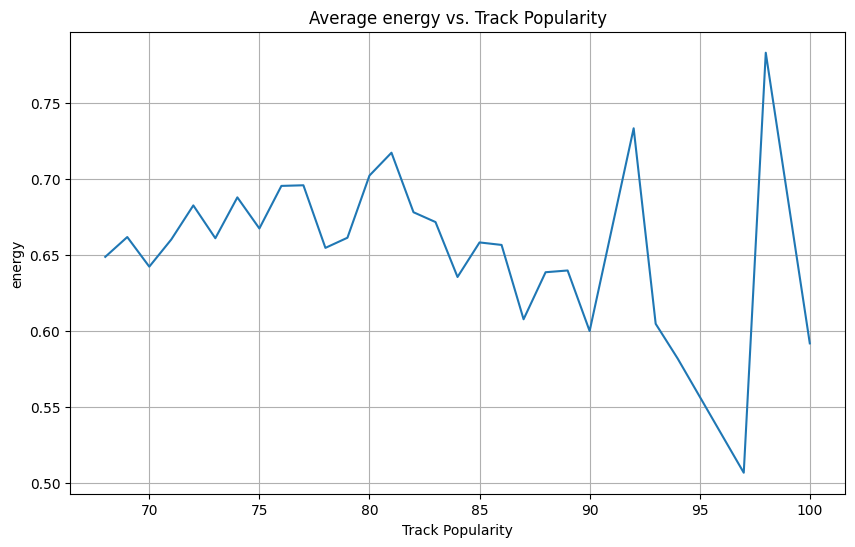

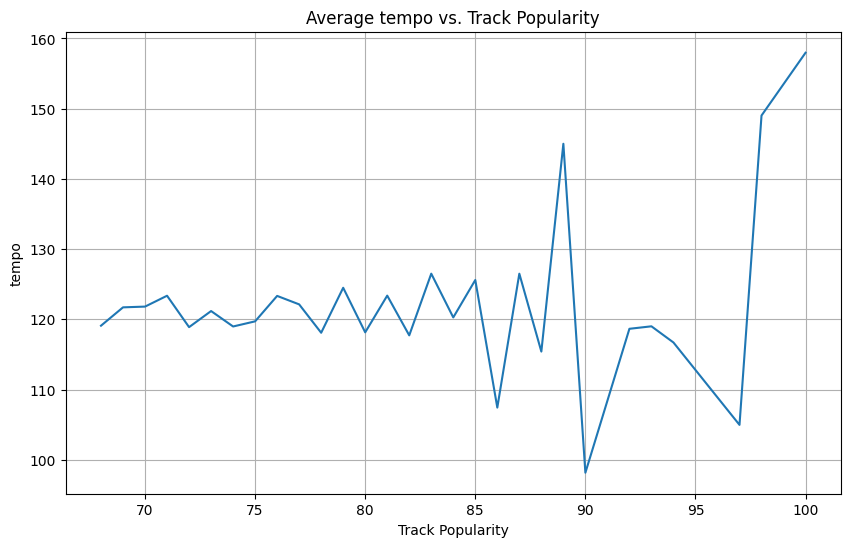

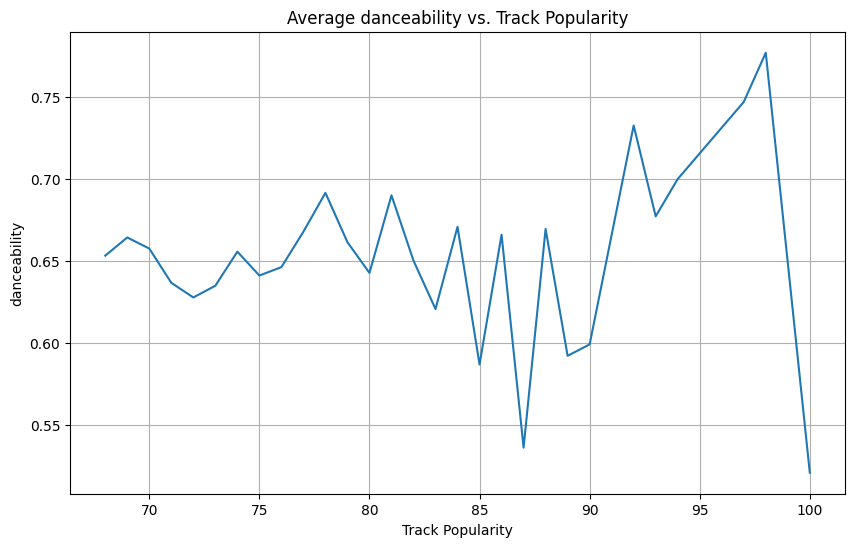

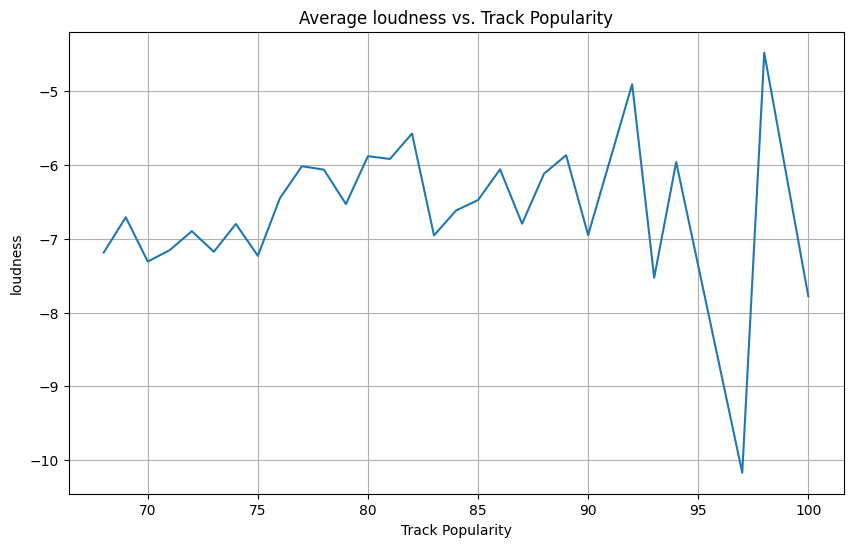

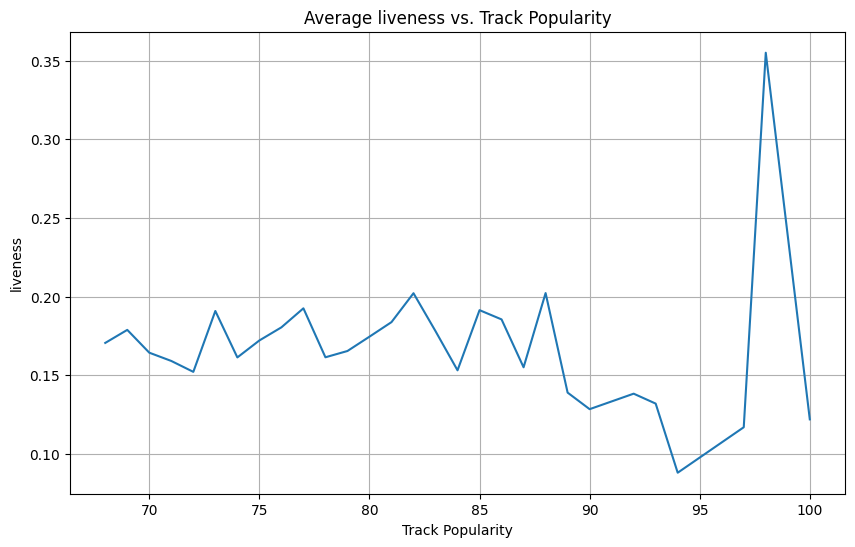

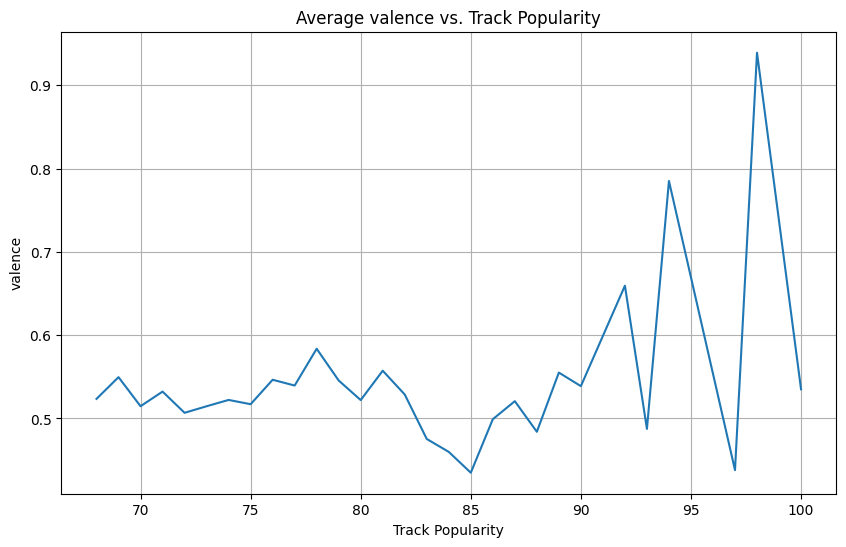

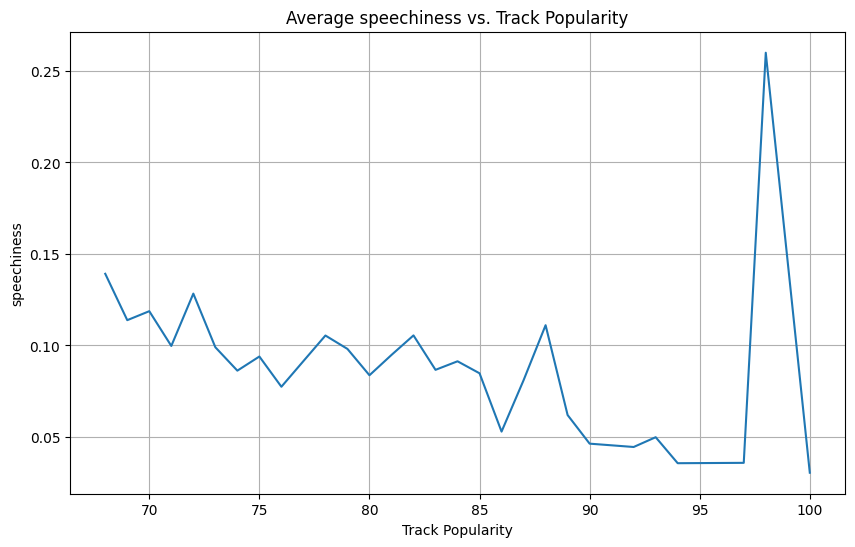

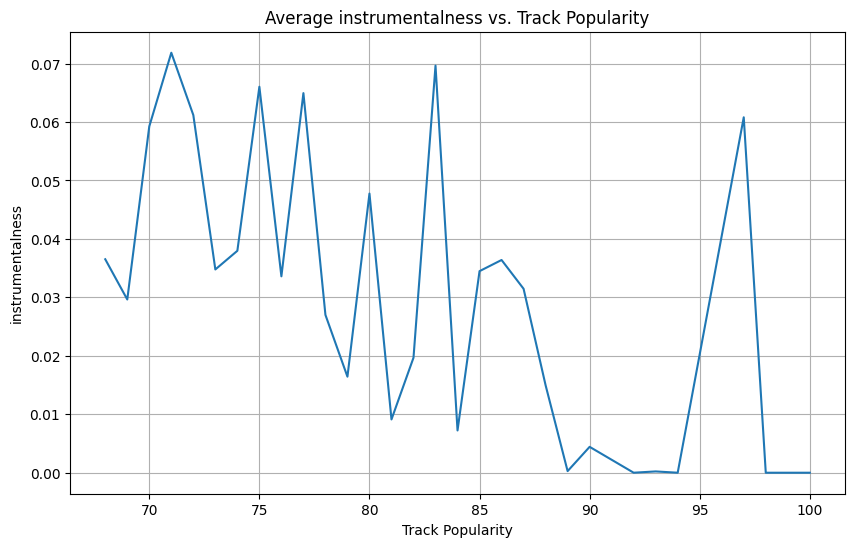

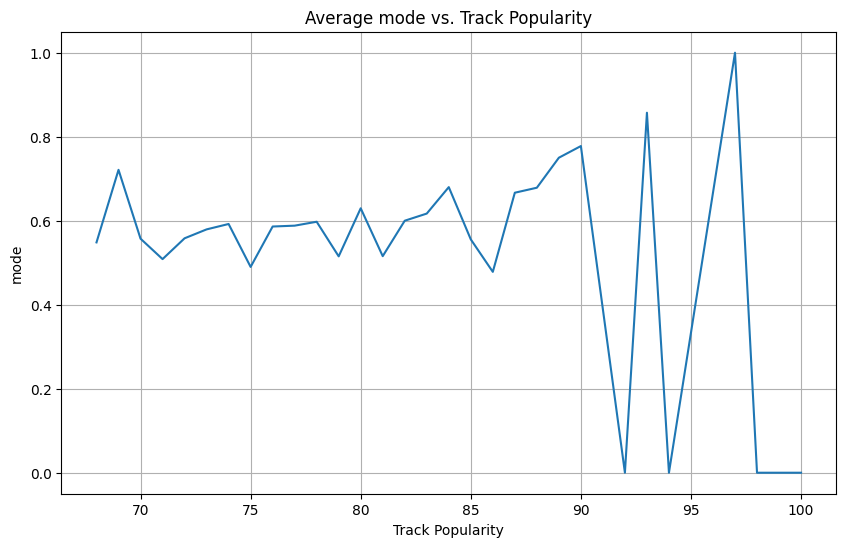

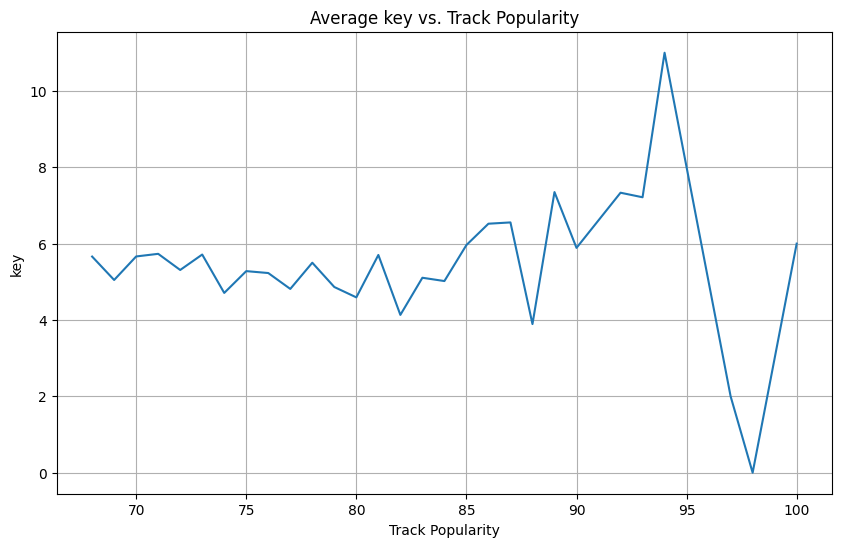

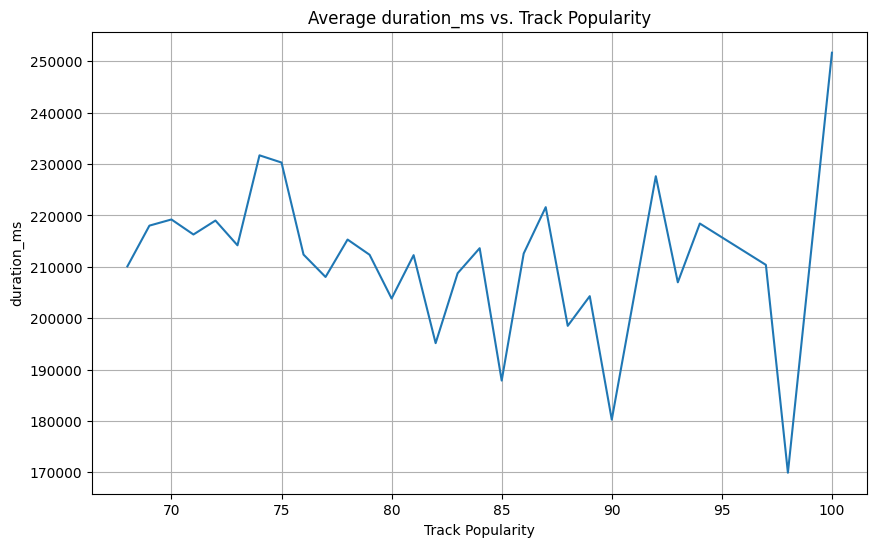

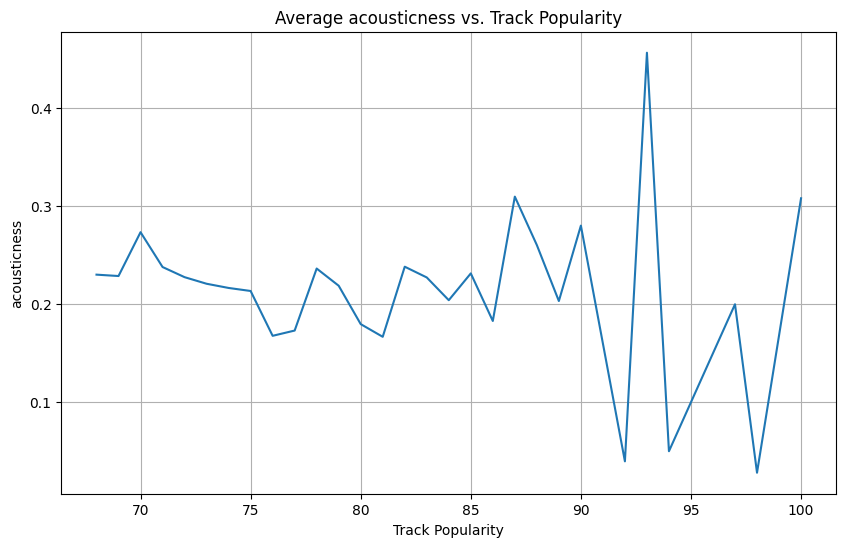

In [ ]:
# prompt: I have a pair plot thing that uses this"sns.pairplot(primary_vars);" can you make a them into a line plot averaging the points

import matplotlib.pyplot as plt

# Calculate the mean of each variable grouped by track popularity
means = primary_vars.groupby('track_popularity').mean()

# Create a line plot for each variable
for column in means.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(means.index, means[column])
    plt.xlabel('Track Popularity')
    plt.ylabel(column)
    plt.title(f'Average {column} vs. Track Popularity')
    plt.grid(True)
    plt.show()
